In [1]:
from __future__ import print_function, division

import pylab as pl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import os
import json


import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors_by_max(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    errors: None or True
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors_by_max(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

Text(0,0.5,'Endogenous')

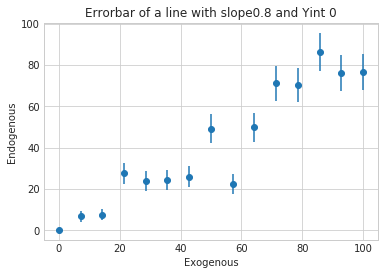

In [3]:
x = np.linspace(0, 100, 15) #(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
a = 0.8
y = line(0.8, x, 0, errors=False)
errors_array = errors_by_max(y)

plt.errorbar(x, y, yerr=errors_array, fmt='o')

plt.title("Errorbar of a line with slope0.8 and Yint 0")
plt.xlabel("Exogenous")
plt.ylabel("Endogenous")


Figure 1: Shows the variability of a line with a slope of .8 and a y intercept of 0. The line off the point represents the margin of error in the dataset. 


# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [19]:
y 

array([  80.        ,   86.62710522,   94.92722789,   95.18908609,
         96.74504322,  110.61358569,  107.77736527,  112.75679935,
        129.23975231,  138.41762224,  145.235913  ,  142.31413357,
        139.5959859 ,  136.95203568,  169.77301828])

In [20]:
x 

array([   0.        ,    7.14285714,   14.28571429,   21.42857143,
         28.57142857,   35.71428571,   42.85714286,   50.        ,
         57.14285714,   64.28571429,   71.42857143,   78.57142857,
         85.71428571,   92.85714286,  100.        ])

In [21]:
x_constant = sm.add_constant(x)

In [22]:
x_constant

array([[   1.        ,    0.        ],
       [   1.        ,    7.14285714],
       [   1.        ,   14.28571429],
       [   1.        ,   21.42857143],
       [   1.        ,   28.57142857],
       [   1.        ,   35.71428571],
       [   1.        ,   42.85714286],
       [   1.        ,   50.        ],
       [   1.        ,   57.14285714],
       [   1.        ,   64.28571429],
       [   1.        ,   71.42857143],
       [   1.        ,   78.57142857],
       [   1.        ,   85.71428571],
       [   1.        ,   92.85714286],
       [   1.        ,  100.        ]])

# 3. use statsmodels.api.OLS to fit x and y

In [8]:
#The wrong way
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     369.3
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.85e-11
Time:                        14:15:15   Log-Likelihood:                -55.081
No. Observations:                  15   AIC:                             112.2
Df Residuals:                      14   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8319      0.043     19.216      0.000         0.739     0.925
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.629
Skew:                          -0.700   Prob(JB):                        0.443
Kurtosis:                       3.805   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
smfit_constant = smf.OLS(y, x_constant).fit()
smfit_constant.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     99.93
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.81e-07
Time:                        14:15:15   Log-Likelihood:                -55.035
No. Observations:                  15   AIC:                             114.1
Df Residuals:                      13   BIC:                             115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.4186      5.010     -0.283      0.782       -12.243     9.406
x1             0.8524      0.085      9.997      0.000         0.668     1.037
==============================================================================
Omnibus:                        4.398   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                1.918
Skew:                          -0.771   Prob(JB):                        0.383
Kurtosis:                       3.830   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: From these two tables, we can see that the r^2 value of the OLS regression Results varies when you pass different exogenous variables through the smf.ols function (x constant vs x). The X r^2 value is closer to 1 meaning that the line of fit it a closer match to the distribution than the x constant.

# plot the data (as points) and both statsmodels fits

Text(0,0.5,'Y Description')

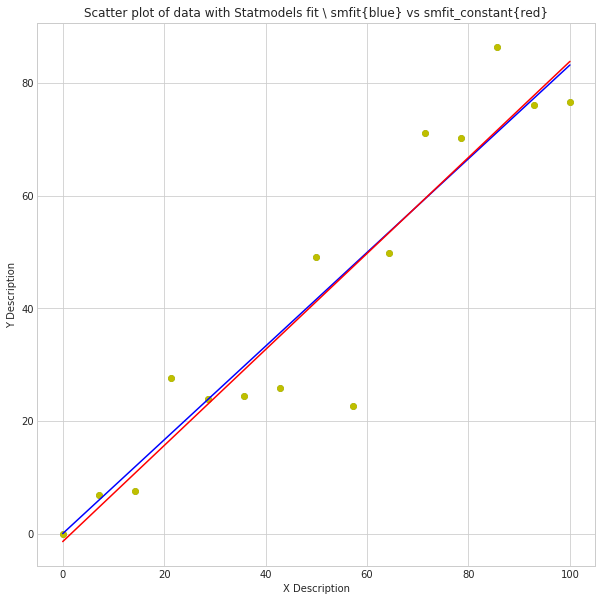

In [10]:
plt.figure(figsize=(10,10)) 
plt.scatter(x, y, linewidths=0.5, marker="o") #plot of points
#(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)


plt.plot(x, y, 'yo')
plt.plot(x, smfit.predict(x), "b-") #Prof. Bianco helped me with this, didn't know predict function 
plt.plot(x, smfit_constant.predict(x_constant), "r-")

plt.title("Scatter plot of data with Statmodels fit \ smfit{blue} vs smfit_constant{red}")

plt.xlabel("X Description")
plt.ylabel("Y Description")

Figure 2: In this figure, the data is plotted as a scatter (Yellow dots) against two best fit lines. The blue line represents the best fit that has a y intercept of 0 while the red line has an intercept slightly less than 0 and has a higher slope. Both lines are good fits to the data. 

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'Endogenous')

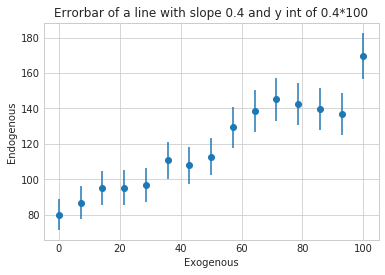

In [11]:
x = np.linspace(0, 100, 15)
a = 0.8
b = a*100

y = line(a, x, b, errors=True)


plt.errorbar(x, y, yerr=errors_by_max(y), fmt='o')

plt.title("Errorbar of a line with slope 0.4 and y int of 0.4*100")
plt.xlabel("Exogenous")
plt.ylabel("Endogenous")

figure 3: In this figure, we can see that as the slope of the line increases so does the variance in the error of the data. 

In [12]:
smfit2 = smf.OLS(y, x).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           9.13e-08
Time:                        14:15:16   Log-Likelihood:                -77.555
No. Observations:                  15   AIC:                             157.1
Df Residuals:                      14   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9404      0.194     10.019      0.000         1.525     2.356
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.643
Skew:                          -0.095   Prob(JB):                        0.725
Kurtosis:                       2.003   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
smfit_constant2 = smf.OLS(y, x_constant).fit()
smfit_constant2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     153.7
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.41e-08
Time:                        14:15:16   Log-Likelihood:                -50.520
No. Observations:                  15   AIC:                             105.0
Df Residuals:                      13   BIC:                             106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         79.9590      3.708     21.564      0.000        71.948    87.970
x1             0.7824      0.063     12.397      0.000         0.646     0.919
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.354
Skew:                          -0.340   Prob(JB):                        0.838
Kurtosis:                       2.677   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


# 6. repeat step 3

Text(0,0.5,'Y Description')

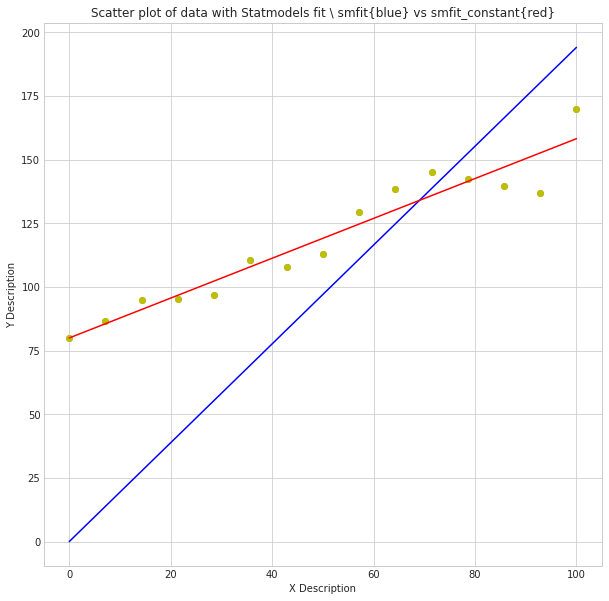

In [14]:
plt.figure(figsize=(10,10)) 
plt.scatter(x, y, linewidths=0.5, marker="o") #plot of points
#(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)


plt.plot(x, y, 'yo')
plt.plot(x, smfit2.predict(x), "b-") #Prof. Bianco helped me with this, didn't know predict function 
plt.plot(x, smfit_constant2.predict(x_constant), "r-")

plt.title("Scatter plot of data with Statmodels fit \ smfit{blue} vs smfit_constant{red}")

plt.xlabel("X Description")
plt.ylabel("Y Description")

Figure 4: The red line represents the x_constantand as you can see is a better line of fit than the blue line (which represents the OLS of x). The  red line has a y intercept that is between 50 and 100 while the blue line has a y int of 0 and a much steeper slope than the red line of fit. There is a much greater difference in this plot when compared to the 2nd figure which showed both lines being similar to one another and good fits for the data. However, in this one you see that the slope of the line being bigger has made a difference and shows that the x constant is the best way to represent the data. 

# STEP 7 now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [15]:
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

In [16]:
myregression(x_constant, y, 'W')

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            WLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     153.7
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.41e-08
Time:                        14:15:16   Log-Likelihood:                -50.520
No. Observations:                  15   AIC:                             105.0
Df Residuals:                      13   BIC:                             106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         79.9590      3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


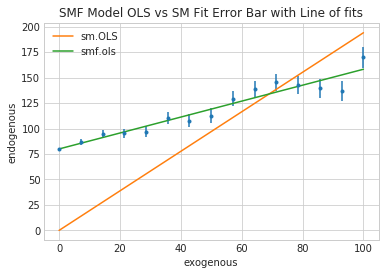

In [18]:

# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors_by_max(x), fmt='.')
pl.plot(x, smfit2.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.title("SMF Model OLS vs SM Fit Error Bar with Line of fits")
pl.legend();

figure 5: In this figure we see that the smf.OLS is the the best possible fit for the data when the variance error is taken into account as the as most points are within the error variance. The orange line represents the smfit OLS which has a steeper slope and is not a good representation of the data. 